<a href="https://colab.research.google.com/github/polaroidz/statistics/blob/master/P%20Test%20para%20Media%20Unica.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# P-Test for Single Mean



In [0]:
import math

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st
import seaborn as sns

np.random.seed(seed=42)

%matplotlib inline

## Simulação da Amostra

A amostra gerada será baseada numa distribuição normal, que deve ser condição dos Testes de Hipóteses que iremos realizar posteriormente.

---

**Framework Matemática**

**1. Distribuição Normal**

É uma distribuição teórica de probabilidade que é simétrica ao redor da média $\mu$ e com variância $\sigma^2$. 

>$P(X) = \frac{1}{\sigma \sqrt{2 \pi}}\exp(-{\frac{1}{2}}{(\frac{x - \mu}{\sigma})^2}) $

**2. Central Limit Theorem (CLT)**

De acordo com esse teorema, dada uma distribuição de comportamento normal, é garatindo que 95% dos dados estejam localizados ao menos dois desvios padrão $\pm 2\sigma$ da média. 

Usaremos esse teorema para inferir intervalos de confiança e fazer testes de Hipóteses.

Média da Amostra Simulada: 118.20271686633805
Variância da Amostra Simulada: 1.6807245386015568
Desvio da Amostra Simulada: 1.2964276063867033


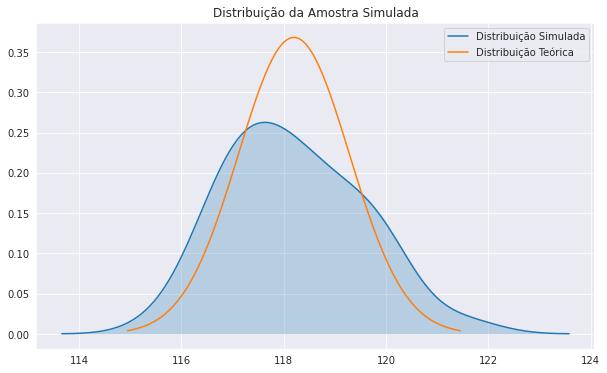

In [41]:
#@title Parâmetros da Amostra Simulada
n = 36 #@param 
mean = 118.2 #@param 
sd = 6.5 #@param

sigma = sd / np.sqrt(n)

X = np.random.normal(mean, sigma, n)

th_x = np.linspace(mean - 3*sigma, mean + 3*sigma, 100)
th_y = st.norm.pdf(th_x, mean, sigma)

print("Média da Amostra Simulada:", X.mean())
print("Variância da Amostra Simulada:", X.var())
print("Desvio Padrão da Amostra Simulada:", X.std())

plt.figure(figsize=(10,6))
sns.set_style("darkgrid")
plt.title("Distribuição da Amostra Simulada")
sns.kdeplot(data=X, shade=True, label="Distribuição Simulada")
sns.lineplot(x=th_x, y=th_y, label="Distribuição Teórica");

## Inferência - Etapas

Iremos realizar os seguintes cálculos para inferir sobre a média sugerida da população (pop_mean) através da construção de um **intervalo de confiança**, realização do **teste de hipótese** com a significância fornecida (alpha), calcular se o teste atingiu o desejado (**power**) e fornecer o **tamanho ideal da amostra** para corrigir o teste caso esse esteja "fraco".

**1. Encontrar o valor crítico z (z-score)** 

O valor critico é encontrado a partir de uma observação da curva teórica da distribuição normal onde o objetivo é encontrar o número de desvios padrão da média ideal para garantir o CLT.

Por exemplo, para um interval de confiança de 95% o valor critico seria:

>$\hat{z} = (1 - CI) / 2 = (1 - 0.95) / 2 = 0.025$

Se olharmos numa tabela de valores z:

>$z^\star = PPF(\hat{z}) = PPF(0.025) = 1.98$

Observações:

* PPF significa *Percent Point Function* e calcula o inverso do percentil fornecido.

* Dividimos por dois por que o teste é two-sided, ou seja, construimos o intervalo ao redor da média.

**2. Construção do Intervalo de Confiança**

O Intervalo de Confiança simboliza que das possiveis amostras da população, por exemplo, devem com 95% de certeza possuir uma média dentro desse intervalo. Nos ajuda a mensurar os resultados do teste de hipótese mas não infererem sobre a real média população.

> $\bar{x} \pm z^\star SE \text{ ou } \bar{x} \pm z^\star \frac{\sigma}{\sqrt{n}}$

In [40]:
#@title Parâmetros da Inferência

pop_mean = 100 #@param
alpha = 0.05 #@param

ci = 1 - alpha
power = 0.8 #@param
beta = 1 - power

z_critical = -st.norm.ppf((1 - ci) / 2)
SE = z_critical * (X.std() / np.sqrt(n))
ci_lower = X.mean() - SE
ci_upper = X.mean() + SE

print("Intervalo de Confiança Desejado:", ci * 100, "%")
print("Valor Crítico Adotado:", z_critical)
print("Margem de Erro:", SE)
print("Intervalo de Confiança: ({:.3f},{:.3f})".format(ci_lower, ci_upper))

print("Hipóteses")
print("Ho  =", pop_mean)
print("Ha !=", pop_mean)


Intervalo de Confiança Desejado: 95.0 %
Valor Crítico Adotado: 1.959963984540054
Margem de Erro: 0.32193872370918564
Intervalo de Confiança: (117.718,118.362)
Hipóteses
Ho  = 100
Ha != 100
